# **Calibrating Photometric Data**

the following details standard practice for calibrating photometric data based on flux measurements. these are converted to magnitudes in the SDSS set of u'g'r'i'z' filters (any three may be used in OPTICAM at any one time). 



1. obtain a signal. a measured number of counts can be converted to a signal by dividing by exposure time. convert to an "instrumental magnitude" - the apparent magnitude as observed by the instrument on earth.

$$
    m_{inst} = -2.5log_{10}\left(\frac{F[counts]}{t_{exp}}\right)
$$



2. eliminate the effects of atmospheric extinction. the amount of extinction depends on airmass $z$, representative of path length through the atmosphere - so in turn inversely depending on zenith angle $\theta$. the "extinction coefficient" $k$ is dependent on altitude. a value for $k$ can be obtained by taking many measurements of instrumental magnitude for the same (non-variable) star, for different airmasses (changing zenith angle). plotting $z$ against $m_{inst}$ will yield $k$ as the gradient. this may change slightly from night to night as the composition, temperature, and density of the atmosphere vary.

$$
    m_{inst} = m_{inst0} + \frac{k}{cos\theta}
    \\\Rightarrow m_{inst0} = m_{inst} - kz
$$



3. further extinction in the atmosphere occurs due to Rayleigh scattering - with a $\lambda^{-4}$ dependence, shorter wavelengths are scattered more. this means more extinction is present in bluer filters (u', g') say than redder filters (r', i', z'). a secondary extinction coefficient along with the colour index $C$ (difference in magnitude in two neighbouring filters) can be introduced to correct for this. 

$$
    m_{intst0} = m_{inst} - (k + k_2C)z
$$



4. this corrected magnitude must now be converted into the u'g'r'i'z' system. using known (primary) stars, their observed instrumental magnitudes (also atmosphere-corrected as above) in the u'g'r'i'z' bands can be compared to standard catalogue values $m_{std}$. the difference is the "zero-point" magnitude $m_{zp}$, unique for each filter. 

$$
    m_{std} - m_{inst0, std} = m_{zp}
$$



5. in reality, the instrument used for obseving the target star may be slightly different to that used to define the u'g'r'i'z' system - so this can again be corrected for colour differences. the "colour term" c can be found as the gradient of a graph of of $m_{std} - m_{inst0,std} - m_{zp}$ against colour index $C$. the y intercept is set to zero by using a zero point calculated from a star of $C=0$ (eg. Vega).
$$
    m_{std} - m_{inst0, std} = m_{zp} + cC
$$



6. the magnitude of the target star in each filter is then found by including this zero point (and colour correction if necessary).

$$
    m = m_{inst0} + m_{zp} + cC
    \\ = m_{inst} - (k + k_2C)z + m_{zp} + cC
$$



for example, in the g' filter, the calibrated magnitude will be as follows:

$$
    g' = g'_{inst} - (k_g + k_{2,g}[g'-r'])z + g_{zp} + c_g[g'-r']
$$

where $g'_{inst}$ is the instrumental magnitude as on earth, then correction to first-order for atmospheric extinction. this is adjusted to the filter set by the zero point, and smaller corrections due to colour discrepancies include the colour term (for the g' filter, its "colour conjugate" is r', hence $[g'-r']$.



http://www.vikdhillon.staff.shef.ac.uk/teaching/phy217/instruments/phy217_inst_photcal.html

https://arxiv.org/pdf/astro-ph/0201143.pdf

https://classic.sdss.org/dr7/algorithms/jeg_photometric_eq_dr1.html

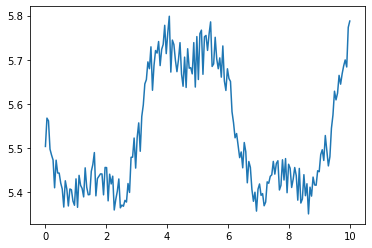

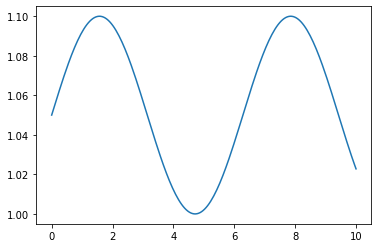

In [46]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import numpy.random as ran

from numpy import sin, cos, pi, log10

# create time array and exposure time
t = np.linspace(0, 10, 200)
t_exp = max(t) - min(t)

# simulate a noisy signal for a vairbal star, and express in counts
signal = 0.01*(sin(t) + sin(3*t)/3)
noise = ran.uniform(-0.003, 0.003, 200)
counts = signal+noise+0.06

# calculate instrumental magnitude
m_inst = -2.5*log10(counts/t_exp)
plt.plot(t, m_inst)
plt.show()

airmass = 1.05 + 0.05*sin(t)
plt.plot(t, airmass)
plt.show()

# k = 

m_inst0 = m_inst - k*z

